**Exercise 1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt
import scipy.special as sp
import scipy.stats as stat
import scipy.integrate as intg
import scipy.linalg as lin

In [2]:
health = pd.read_csv("C:/Users/danie/BootCamp2018/Econ/Wk5_StrEst/data/clms.txt", header=None, names=['clms'])
health # scope out the data

,clms
0,361.65
1,123.04
2,541.77
3,862.90
4,55.60
5,3728.56
6,70.00
7,730.63
8,420.56
9,81.63


**(a)**

In [3]:
print(health.describe())

                clms
count   10619.000000
mean      720.277975
std      3972.850824
min         0.010000
25%        74.450000
50%       172.210000
75%       451.535000
max    227967.250000


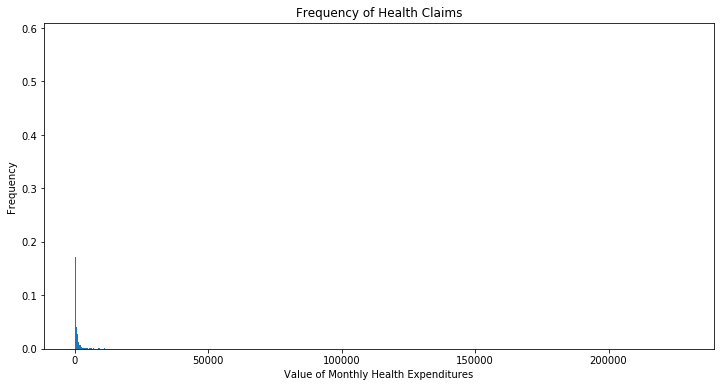

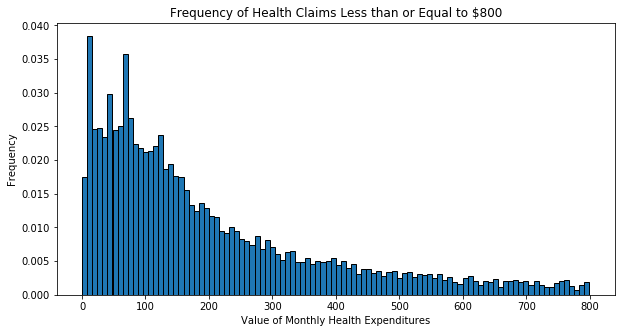

In [4]:
# Plots

plt.subplots(figsize=(12, 6))
weights = (1/len(health)) * np.ones_like(health["clms"])
plt.hist(health["clms"], 1000, weights = weights)
plt.title("Frequency of Health Claims")
plt.ylabel("Frequency")
plt.xlabel("Value of Monthly Health Expenditures")
plt.show()

plt.subplots(figsize=(10, 5))
weights = (1/len(health)) * np.ones_like(health[health["clms"] < 800])
plt.hist(health[health["clms"] < 800]["clms"], 100, weights = weights, 
         edgecolor='k')
plt.title("Frequency of Health Claims Less than or Equal to $800")
plt.ylabel("Frequency")
plt.xlabel("Value of Monthly Health Expenditures")
plt.show()

I would prefer the second histogram because the majority of the data lie within the set of claims less than $800. So the second histogram provides a better representation of the sample.

**(b)**

In [5]:
def GA(x, a, b): 
    
    G = math.gamma(a)
    distr = (1/((b ** a) * G)) * ( x ** (a - 1)) * (np.exp(-(x / b)))
    return distr
    
def LogLikeGA(xvals, α, β):

    distrvals = GA(xvals, α, β)
    ln_distrvals = np.log(distrvals)
    l_vals = ln_distrvals.sum()
    return l_vals

def GA_cr(params, *args):

    α, β = params
    xvals = args
    l_vals = LogLikeGA(xvals, α, β)
    sign_ll = -l_vals
    return sign_ll

      fun: 82076.64049645475
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00145519, 0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([2.21750964e-01, 2.19131283e+04])


C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


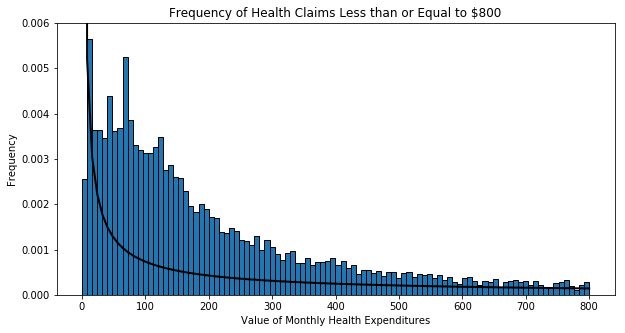

In [6]:
#MLE
β_0 = health["clms"].var()/health["clms"].mean()
α_0 = health["clms"].mean()/β_0
params_0 = np.array([α_0, β_0])
args_mle = (health["clms"])
results = opt.minimize(GA_cr, params_0, args=(args_mle), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None)))
α_hat, β_hat = results.x
print(results)

#MLE plot 
plt.subplots(figsize=(10, 5))
weights = (1/len(health)) * np.ones_like(health[health["clms"] < 800])
plt.hist(health[health["clms"] < 800]["clms"], 100, normed = True,
        edgecolor='k')
plt.title("Frequency of Health Claims Less than or Equal to $800")
plt.ylabel("Frequency")
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylim(0, 0.006)
dist_pts = np.linspace(1e-10, 800, 100)
plt.plot(dist_pts, GA(dist_pts, α_hat, β_hat),
         linewidth=2, color='k')
plt.show()

**(c)**

In [7]:
def GG(x, a, b, m): 
    
    G = math.gamma(a / m)
    distr = (m / ((b ** a) * G)) * (x ** (a - 1)) * (np.exp(-(x / b) ** m))
    return distr
    
def LogLikeGG(xvals, α, β, m):

    distrvals = GG(xvals, α, β, m)
    ln_distrvals = np.log(distrvals)
    l_vals = ln_distrvals.sum()
    return l_vals

def GG_cr(params, *args):

    α, β, m = params
    xvals = args
    l_vals = LogLikeGG(xvals, α, β, m)
    sign_l = -l_vals
    return sign_l

      fun: 82076.63563065456
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.62079993,  0.09167707, -1.08848326])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([2.21760611e-01, 2.19131280e+04, 9.97055896e-01])


C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


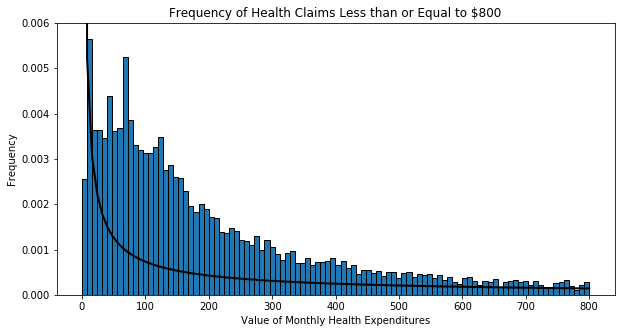

In [8]:
#MLE
#calculate MLE
β_0 = β_hat
α_0 = α_hat
m_0 = 1
params_0 = np.array([α_0, β_0, m_0])
args_mle = (health["clms"])
results = opt.minimize(GG_cr, params_0, args=(args_mle), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
α_GGhat, β_GGhat, m_GGhat = results.x
print(results)

#Plot MLE with histogram 
plt.subplots(figsize=(10, 5))
weights = (1/len(health)) * np.ones_like(health[health["clms"] < 800])
plt.hist(health[health["clms"] < 800]["clms"], 100, normed = True,
        edgecolor='k')
plt.title("Frequency of Health Claims Less than or Equal to $800")
plt.ylabel("Frequency")
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylim(0, 0.006)
dist_pts = np.linspace(1e-10, 800, 100)
plt.plot(dist_pts, GG(dist_pts, α_GGhat, β_GGhat, m_GGhat),
         linewidth=2, color='k')
plt.show()

**(d)**

In [9]:
def GB2(x, a, b, p,q): 
    
    numer = a * x ** (a * p - 1)
    denom  = b ** (a * p) * sp.beta(p, q) * (1 + (x / b) ** a)\
                                                        ** (p + q)
    return numer / denom
    
def LogLikeGB2(xvals, a, b, p, q):

    distrvals = GB2(xvals, a, b, p,q)
    ln_distrvals = np.log(distrvals)
    l_vals = ln_distrvals.sum()
    return l_vals

def GB2_cr(params, *args):

    a, b, p, q = params
    xvals = args
    l_vals = LogLikeGB2(xvals, a, b, p, q)
    sign_l = -l_vals
    return sign_l


      fun: 76475.69951018412
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.61817297,  0.        , 14.34236765,  1.08702807])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 145
      nit: 11
   status: 0
  success: True
        x: array([7.03147787e-01, 2.13269112e+08, 9.85049218e-01, 9.99998571e+03])


C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


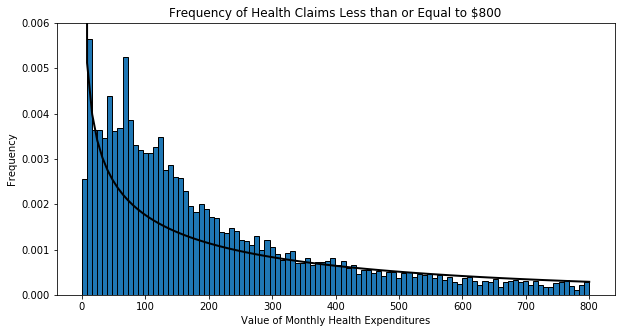

In [10]:
# MLE
a_0 = m_GGhat
q_0 = 10000
b_0 = q_0 **(m_GGhat) * β_GGhat
p_0 = α_GGhat / m_GGhat

params_0 = np.array([a_0, b_0, p_0, q_0])
args_mle = (health["clms"])
results = opt.minimize(GB2_cr, params_0, args=(args_mle), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None), (1e-10, None), 
                               (1e-10, None)))
a_GB2hat, b_GB2hat, p_GB2hat, q_GB2hat = results.x
print(results)

#MLE plot 
plt.subplots(figsize=(10, 5))
weights = (1/len(health)) * np.ones_like(health[health["clms"] < 800])
plt.hist(health[health["clms"] < 800]["clms"], 100, normed = True,
        edgecolor='k')
plt.title("Frequency of Health Claims Less than or Equal to $800")
plt.ylabel("Frequency")
plt.xlabel("Value of Monthly Health Expenditures")
plt.ylim(0, 0.006)
dist_pts = np.linspace(1e-10, 800, 100)
plt.plot(dist_pts, GB2(dist_pts, a_GB2hat, b_GB2hat, p_GB2hat, q_GB2hat),
         linewidth=2, color='k')
plt.show()

**(e)**

In [11]:
h_0 = LogLikeGA(health["clms"], α_hat, β_hat)
mle = LogLikeGB2(health["clms"], a_GB2hat, b_GB2hat, p_GB2hat, q_GB2hat)
val = 2 * (mle - h_0)
GApval = 1.0 - stat.chi2.cdf(val, 4)
print('chi squared (4) GA = ', GApval)

h_0 = LogLikeGG(health["clms"], α_GGhat, β_GGhat, m_GGhat)
val = 2 * (mle - h_0)
GGpval = 1.0 - stat.chi2.cdf(val, 4)
print('chi squared (4) GG = ', GGpval)

chi squared (4) GA =  0.0
chi squared (4) GG =  0.0


**(f)**

In [12]:
GB2_params = (a_GB2hat, b_GB2hat, p_GB2hat, q_GB2hat)
pr_GB2 = intg.quad(GB2, 1000, np.inf, args = GB2_params)
print(pr_GB2)

GA_params = (α_hat, β_hat)
pr_GA = intg.quad(GA, 1000, np.inf, args = GA_params)
print(pr_GA)

(0.16304448051907652, 7.818147402444779e-09)
(0.4519639472347076, 8.886921127699774e-09)


**Exercise 2**

In [13]:
c, k, w, r, y  = np.loadtxt("C:/Users/danie/BootCamp2018/Econ/Wk5_StrEst/data/MacroSeries.txt", delimiter = ",").T

**(a)**

In [14]:
def Brock(k, w, α, ρ, μ, σ): 
    
    z_t = np.log(w / ((1 - α) * k ** α))
    z_tm1 = z_t[:-1]
    z_tm1 = np.insert(z_tm1, 0, μ)
    prob = stat.norm(ρ * z_tm1 + (1 - ρ) * μ, σ).pdf(z_t)
    return prob
    
def LogLikeBrock(k, w, α, ρ, μ, σ):

    distrvals = Brock(k, w, α, ρ, μ, σ)
    distrvals[distrvals == 0] = 1e-10
    ln_distrvals = np.log(distrvals)
    l_vals = ln_distrvals.sum()
    return l_vals

def Brock_cr(params, *args):

    α, ρ, μ, σ = params
    k, w = args
    l_vals = LogLikeBrock(k, w, α, ρ, μ, σ)
    sign_l = -l_vals
    return sign_l

In [15]:
# MLE

α_0 = 0.5
ρ_0 = 0.5
μ_0 = 1
σ_0 = 10

params_0 = np.array([α_0, ρ_0, μ_0, σ_0])
args_mle = (k, w)
results = opt.minimize(Brock_cr, params_0, args=(args_mle), method='L-BFGS-B',\
                       bounds=((1e-10, 0.999999), (-0.999999, 0.999999), 
                               (1e-10, None), (1e-10, None)))
α_Brockhat, ρ_Brockhat, μ_Brockhat, σ_Brockhat = results.x
print(results)
print(results.hess_inv(np.eye(4)))

      fun: -95.72590566283311
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.89658067e-02,  6.53699317e-05,  2.03215222e-03, -4.12114787e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 365
      nit: 45
   status: 0
  success: True
        x: array([0.83983712, 0.53415274, 4.66476847, 0.09290316])
[[ 1.43977884e+01 -1.89608771e+01 -1.32519558e+02  9.18707894e-01]
 [-1.89608771e+01  2.49940710e+01  1.74541666e+02 -1.20801999e+00]
 [-1.32519558e+02  1.74541666e+02  1.21976436e+03 -8.45313732e+00]
 [ 9.18707894e-01 -1.20801999e+00 -8.45313732e+00  5.89207858e-02]]


**(b)**

In [16]:
def Brock2(k, r, α, ρ, μ, σ): 
    
    z_t = np.log(r / ((1 - α) * k ** α))
    z_tm1 = z_t[:-1]
    z_tm1 = np.insert(z_tm1, 0, μ)
    prob = stat.norm(ρ * z_tm1 + (1 - ρ) * μ, σ).pdf(z_t)
    return prob
    
def LogLikeBrock2(k, r, α, ρ, μ, σ):

    distrvals = Brock2(k, r, α, ρ, μ, σ)
    distrvals[distrvals == 0] = 1e-10
    ln_distrvals = np.log(distrvals)
    l_vals = ln_distrvals.sum()
    return l_vals

def Brock_cr2(params, *args):

    α, ρ, μ, σ = params
    k, r = args
    l_vals = LogLikeBrock2(k, r, α, ρ, μ, σ)
    sign_l = -l_vals
    return sign_l

In [17]:
# MLE

α_0 = 0.5
ρ_0 = 0.5
μ_0 = 1
σ_0 = 9.5

params_0 = np.array([α_0, ρ_0, μ_0, σ_0])
args_mle = (k, r)
results = opt.minimize(Brock_cr, params_0, args=(args_mle), method='L-BFGS-B',\
                       bounds=((1e-10, 0.999999), (-0.999999, 0.999999), 
                               (1e-10, None), (1e-10, None)))
α_Brockhat2, ρ_Brockhat2, μ_Brockhat2, σ_Brockhat2 = results.x
print(results)
print(results.hess_inv(np.eye(4)))

      fun: -92.65339486382427
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.59110097e+01, -6.11066753e-05, -3.00843794e-03,  5.38449285e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 140
      nit: 12
   status: 0
  success: True
        x: array([1.00000000e-10, 4.17807024e-01, 2.47340078e-03, 9.58021689e-02])
[[  1.          -2.20546238 -19.30707131   1.50383912]
 [ -2.20546238   4.98452675  42.60854191  -3.3190405 ]
 [-19.30707131  42.60854191 372.8680822  -29.06903325]
 [  1.50383912  -3.3190405  -29.06903325   2.27322684]]


**(c)**

In [18]:
z_opt  = np.log(1 / ((α_Brockhat2) * 7_500_000 ** (α_Brockhat2 - 1)))
prob  = 1 - stat.norm.cdf(z_opt, ρ_Brockhat2 * 10 + (1 - ρ_Brockhat2) * \
                           μ_Brockhat2, σ_Brockhat2)
print("Probability that interest rate will be greater than 1 this period= ", 
      prob)

Probability that interest rate will be greater than 1 this period=  0.0


**Exercise 3**

In [19]:
usincmoms = np.loadtxt("C:/Users/danie/BootCamp2018/Econ/Wk5_StrEst/data/usincmoms.txt")
a = usincmoms[:,0]
b = usincmoms[:,1]

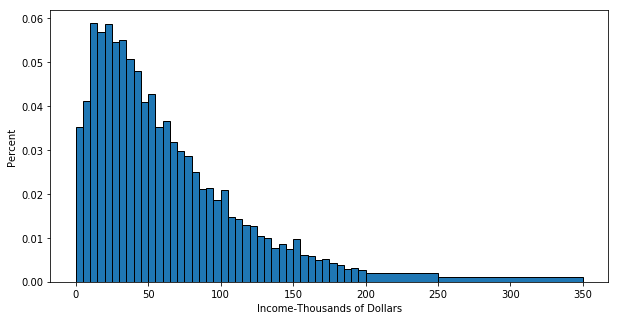

In [20]:
plt.subplots(figsize=(10, 5))
a[-2] = a[-2] / 10
a[-1] = a[-1] / 20
width = np.concatenate((5 * np.ones_like(a[:-2]), np.array([50]), 
                        np.array([100])))
plt.bar(b / 1000, a, width=width, edgecolor='k')
plt.xlabel("Income-Thousands of Dollars")
plt.ylabel("Percent")
plt.show()

**(b)**

In [21]:
def norm(x, μ, σ):
    distrvals= (1 / x) * (1 / (σ * np.sqrt(2 * np.pi)) * \
                          np.exp(-(np.log(x) - μ) ** 2 / (2 * σ ** 2)))
    distrvals[distrvals==0] = 1e-10
    return distrvals

def moments(b, μ, σ):
    distrvals = 5000 * norm(b, μ, σ)
    distrvals[distrvals == 0] = 1e-10
    return distrvals

def error(a, b, μ, σ, simple=False):
    mom = moments(b, μ, σ)
    momd = a
    if simple:
        e = mom - momd
    else:
        e = (mom - momd) / momd
    return e

def cr(params, *args):
    μ, σ = params
    a, b, W = args
    e = error(a, b, μ, σ)
    val = np.dot(np.dot(e.T, W), e) 
    return val

      fun: 0.03251612477668702
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.38975506e-06, -1.56610835e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 8
   status: 0
  success: True
        x: array([10.84684127,  1.0296976 ])


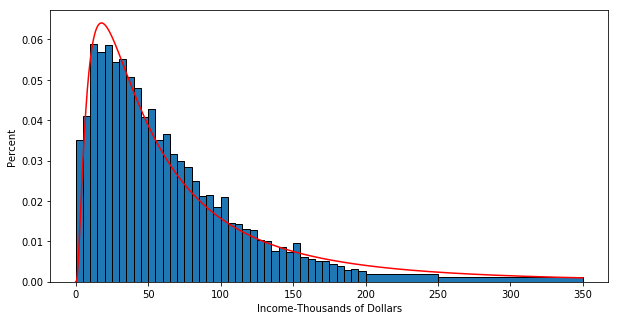

In [22]:
# GMM
μ_0 = np.log(np.mean(a @ b))
σ_0 = 2
params_0 = np.array([μ_0, σ_0])
W_hat = np.diag(a)
args_gmm = (a, b, W_hat)
results = opt.minimize(cr, params_0, args = (args_gmm), method='L-BFGS-B', \
                      bounds = ((None, None), (1e-10, None)))
μ_GMMhat, σ_GMMhat = results.x
print(results)

# GMM plot
plt.subplots(figsize=(10, 5))
plt.bar(b / 1000, a, width=width, edgecolor='k')
x = np.linspace(1e-10,350000,1000)
yl = 5000 * norm(x, μ_GMMhat, σ_GMMhat)
plt.plot(x / 1000, yl, color='r')
plt.xlabel("Income-Thousands of Dollars")
plt.ylabel("Percent")
plt.show()

**(c)**

In [23]:
def moments(b, α, β):
    moms = 5000 * GA(b, α, β)
    return moms

def error(a, b, α, β, simple=False):
    mom = moments(b, α, β)
    momd = a
    if simple:
        e = mom - momd
    else:
        e = (mom - momd) / momd
    return e

def cr(params, *args):
    α, β = params
    a, b, W = args
    e = error(a, b, α, β)
    val = np.dot(np.dot(e.T, W), e) 
    return val

      fun: 0.006292135657320145
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.00078623e-06, -3.46944695e-10])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 108
      nit: 27
   status: 0
  success: True
        x: array([1.4345036e+00, 4.4424255e+04])


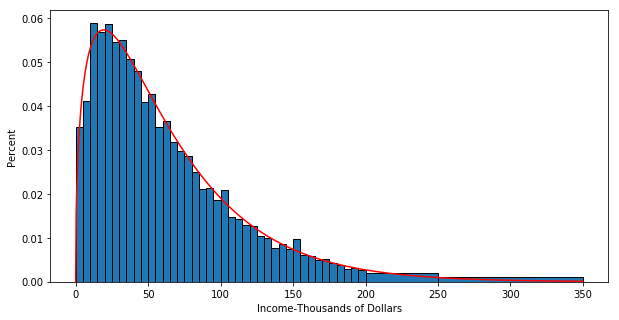

In [24]:
#GMM
α_0 = 3
β_0 = 20_000
params_0 = np.array([α_0, β_0])
results = opt.minimize(cr, params_0, args= (args_gmm), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None)))
α_GMMhat, β_GMMhat = results.x
print(results)

#GMM plot
plt.subplots(figsize=(10, 5))
plt.bar(b / 1000, a, width=width, edgecolor='k')
yg = 5000 * GA(x, α_GMMhat, β_GMMhat)
plt.plot(x / 1000, yg, color='r')
plt.xlabel("Income-Thousands of Dollars")
plt.ylabel("Percent")
plt.show()

**(d)**

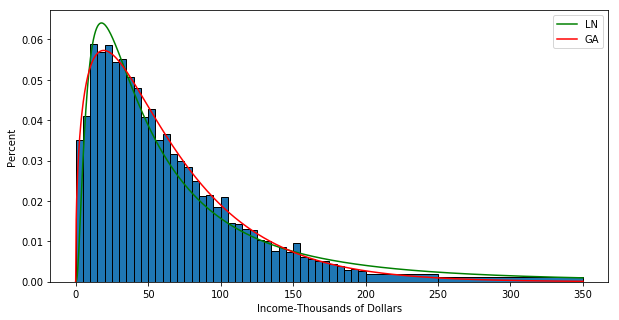

In [25]:
plt.subplots(figsize=(10, 5))
plt.bar(b / 1000, a, width=width, edgecolor='k')
plt.plot(x / 1000, yl, color = "green", label = "LN")
plt.plot(x / 1000, yg, color = "red", label = "GA")
plt.xlabel("Income-Thousands of Dollars")
plt.ylabel("Percent")
plt.legend()
plt.show()

The most precise way to tell which distribution fits the data the best is by using the value returned by the minimization process. It is better fit the smaller this value is. <br>
<br>
It appears as though GA fits data the best.

**(e)**

In [26]:
#GMM
err = np.array([error(a, b, α_GMMhat, β_GMMhat)])
VCV2 = (err.T @ err)/len(a)
W_hat2 = lin.pinv(VCV2)
args_gmm = (a, b, W_hat2)
results = opt.minimize(cr, params_0, args=(args_gmm), method='L-BFGS-B', \
                       bounds=((1e-10, None), (1e-10, None)))
α_GMMhat2, β_GMMhat2 = results.x
print(results)

#GMM plot
plt.subplots(figsize=(10, 5))
plt.bar(b / 1000, a, width=width, edgecolor='k')
yg2 = 5000 * GA(x, α_GMMhat2, β_GMMhat2)
plt.plot(x / 1000, yg2)
plt.xlabel("Income-Thousands of Dollars")
plt.ylabel("Percent")
plt.show()

# I've spent roughly 5 hours on this error alone. I am not able
# to figure it out, nor are my peers. This is the only
# error I have not been able to fix this entire bootcamp.

C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
C:\Users\danie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


OverflowError: math range error

**Exercise 4**

In [27]:
def momentsd():

    mom1 = 1e-20
    mom2 = 1e-20
    mom3 = 1e-20
    mom4 = 1e-20
    return mom1, mom2, mom3, mom4

def moments(c, k, w, r, α, β, ρ, μ):

    z_t = np.log(r / ((α) * k ** (α - 1)))
    z_tp1 = z_t[1:]
    z_t = z_t[:-1]
    
    k_tp1 = k[1:]
    k_t = k[:-1]
    
    c_tp1 = c[1:]
    c_t = c[:-1]
    
    w_t = w[:-1]
    
    mom1 = ((z_tp1 - ρ*z_t - (1 - ρ) * μ)).mean()
    mom2 = ((z_tp1 - ρ*z_t - (1 - ρ) * μ) * z_t).mean()
    mom3 = ((β * α * np.exp(z_tp1) * (k_tp1) ** (α - 1) * \
             (c_t / c_tp1) - 1)).mean()
    mom4 = (((β * α * np.exp(z_tp1) * (k_tp1) ** (α - 1) * \
              (c_t/c_tp1) - 1) * w_t)).mean()
    
    return mom1, mom2, mom3, mom4

def error(c, k, w, r, α, β, ρ, μ, simple):
 
    mom1d, mom2d, mom3d, mom4d = momentsd()
    momd = np.array([[mom1d], [mom2d], [mom3d], [mom4d]])
    mom1, mom2, mom3, mom4 = moments(c, k, w, r, α, β, ρ, μ)
    momsm = np.array([[mom1], [mom2], [mom3], [mom4]])
    if simple:
        e = momsm - momd
    else:
        e = (momsm - momsd) / momsd
    
    return e


def cr(params, *args):
    α, β, ρ, μ = params
    c, k, w, r, W = args
    err = error(c, k, w, r, α, β, ρ, μ, simple=True)
    val = np.dot(np.dot(err.T, W), err) 
    return val

In [28]:
α_0 = 0.2
β_0 = 0.2
ρ_0 = 0.2
μ_0 = 5

params_0 = np.array([α_0, β_0, ρ_0, μ_0])
W_hat = np.eye(4)
args_gmm = (c, k, w, r, W_hat)
results = opt.minimize(cr, params_0, args=args_gmm, method='L-BFGS-B', \
                       bounds=((1e-10, 0.9999999), (1e-10, 0.9999999),
                               (-0.9999999, 0.9999999),(1e-10, None)))

α_GMM, β_GMM, ρ_GMM, μ_GMM = results.x
print('alpha=', α_GMM)
print('beta=', β_GMM)
print('rho=', ρ_GMM)
print('mu=', μ_GMM)

alpha= 0.7024817444132134
beta= 0.9899999949999984
rho= 0.36927361976305667
mu= 5.014802247690846


In [29]:
mom1d, mom2d, mom3d, mom4d  = momentsd()
mom1, mom2, mom3, mom4  = moments(c, k, w, r, α_GMM, β_GMM, ρ_GMM, μ_GMM)
err_new = error(c, k, w, r, α_GMM, β_GMM, ρ_GMM, μ_GMM, True).reshape(4,)

print('Data Moment 1 =', mom1d)
print('Data Moment 2 =', mom2d)
print('Data Moment 3 =', mom3d)
print('Data Moment 4 =', mom4d, '\n')

print('Model Moment 1 =', mom1)
print('Model Moment 2 =', mom2)
print('Model Moment 3 =', mom3)
print('Model Moment 4 =', mom4, '\n')

print('Error vector =', err_new, '\n')
print(results)

Data Moment 1 = 1e-20
Data Moment 2 = 1e-20
Data Moment 3 = 1e-20
Data Moment 4 = 1e-20 

Model Moment 1 = -0.0010192564634763839
Model Moment 2 = 0.00023688659321954432
Model Moment 3 = -5.050506765888782e-09
Model Moment 4 = -0.046707210621564986 

Error vector = [-1.01925646e-03  2.36886593e-04 -5.05050677e-09 -4.67072106e-02] 

      fun: array([[0.00218266]])
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.86066005e-03, -2.85079469e-01, -8.82150256e-06, -2.13737535e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 195
      nit: 31
   status: 0
  success: True
        x: array([0.70248174, 0.98999999, 0.36927362, 5.01480225])
